<a href="https://colab.research.google.com/github/cameron-larkin/Machine_learning_Chelsea/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import combinations

df = pd.read_csv('Chelsea.csv')

df_numeric = df.select_dtypes(include=['float64', 'int64'])

X = df_numeric.drop(columns=['Value'])
y = df_numeric['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model for evaluation
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_pred = lin_reg_model.predict(X_test)
rmse_lin_reg = sqrt(mean_squared_error(y_test, lin_reg_pred))
print(f"Linear Regression - RMSE: {rmse_lin_reg:.2f}")

# Backward Selection
def backward_selection(X_train, X_test, y_train, y_test, model):
    features = list(X_train.columns)
    best_features = features.copy()
    best_rmse = rmse_lin_reg  # Start with the RMSE of the full model

    for _ in range(len(features) - 1):
        candidate_features = [f for f in features if f != 'intercept']  # Remove 'intercept' if present
        for subset in combinations(candidate_features, len(candidate_features) - 1):
            subset = list(subset)

            # Fit the model with the current subset of features
            model.fit(X_train[subset], y_train)
            pred = model.predict(X_test[subset])
            rmse = sqrt(mean_squared_error(y_test, pred))

            # Update the best features if the current subset improves RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_features = subset

    return best_features

# Use backward selection to get the best features
best_features_backward = backward_selection(X_train, X_test, y_train, y_test, lin_reg_model)
print("Best Features (Backward Selection):", best_features_backward)

Linear Regression - RMSE: 897174976.99
Best Features (Backward Selection): ['Age', 'Born', 'Starts', '90s', 'Gls', 'Ast', 'G+A', 'npGls', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Glsp90', 'Astp90', 'G+Ap90', 'npGlsp90', 'npGlsAstp90', 'xGp90', 'xAGp90', 'xG+xAGp90', 'npxGp90', 'npxG+xAGp90']


Feature Importance

Linear Regression - RMSE: 897174976.99
SVM - RMSE: 27207535.72
Decision Tree - RMSE: 40047888.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - RMSE: 55042766.26
Random Forest - RMSE: 29605856.68


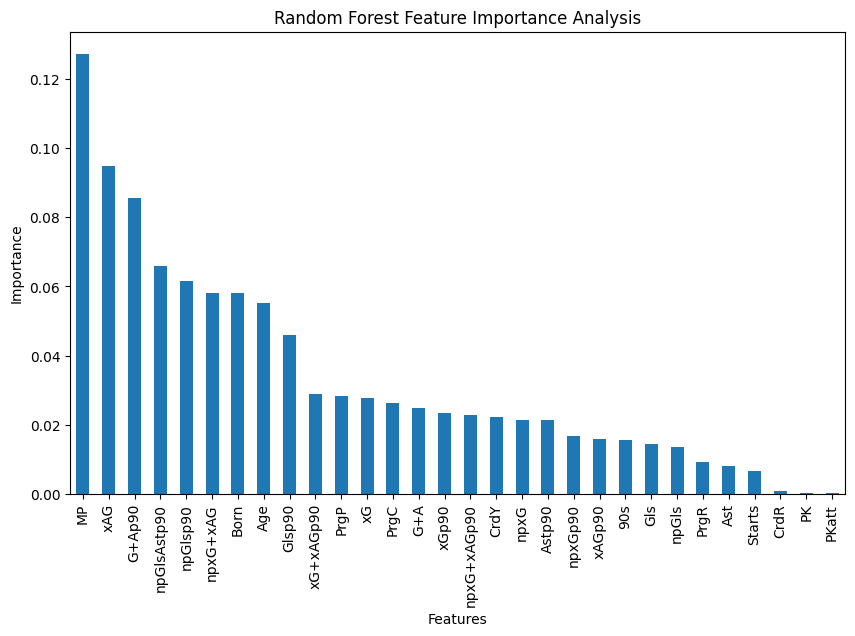

Best Hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best Hyperparameters for SVM: {'C': 0.1, 'epsilon': 0.1}
Best Hyperparameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters for Neural Network: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_path/chelsea.csv' with the actual path to your CSV file
df = pd.read_csv('Chelsea.csv')

# Drop non-numeric columns for simplicity
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define features (X) and target variable (y)
X = df_numeric.drop(columns=['Value'])  # Assuming 'Value' is your target variable
y = df_numeric['Value']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_pred = lin_reg_model.predict(X_test)
rmse_lin_reg = sqrt(mean_squared_error(y_test, lin_reg_pred))
print(f"Linear Regression - RMSE: {rmse_lin_reg:.2f}")

# SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
rmse_svm = sqrt(mean_squared_error(y_test, svm_pred))
print(f"SVM - RMSE: {rmse_svm:.2f}")

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
rmse_dt = sqrt(mean_squared_error(y_test, dt_pred))
print(f"Decision Tree - RMSE: {rmse_dt:.2f}")

# Neural Network (Multilayer Perceptron)
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
rmse_mlp = sqrt(mean_squared_error(y_test, mlp_pred))
print(f"Neural Network - RMSE: {rmse_mlp:.2f}")

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rmse_rf = sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest - RMSE: {rmse_rf:.2f}")

# Feature Importance Analysis using Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='bar')
plt.title('Random Forest Feature Importance Analysis')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Hyperparameter Tuning for Linear Regression
param_grid_lin_reg = {'fit_intercept': [True, False], 'copy_X': [True, False]}
grid_search_lin_reg = GridSearchCV(LinearRegression(), param_grid_lin_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_lin_reg.fit(X_train, y_train)
best_params_lin_reg = grid_search_lin_reg.best_params_
print("Best Hyperparameters for Linear Regression:", best_params_lin_reg)

# Hyperparameter Tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001]}
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Hyperparameter Tuning for Decision Tree
param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Hyperparameter Tuning for Neural Network
param_grid_mlp = {'hidden_layer_sizes': [(50, 50, 50), (100, 100, 100)], 'activation': ['relu', 'tanh'],
                  'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01]}
grid_search_mlp = GridSearchCV(MLPRegressor(), param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train, y_train)
best_params_mlp = grid_search_mlp.best_params_
print("Best Hyperparameters for Neural Network:", best_params_mlp)

# Hyperparameter Tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)